# <font style="color:rgb(50,120,229)">Introduction</font>

Instagram is a photo-enhancing and sharing app for mobile phones. The name came from “Instant Camera and TeleGram”. It allows users to apply different filters to their pictures and share it. It was launched in September 2010 and was an instant hit among its users with 1 Million registered users within 2 months and 10 million in a year. It was acquired by Facebook in 2012 for $1 Billion. [**You know what is cool? A billion dollars!**](https://www.youtube.com/watch?v=4e0n7vTLz1U)

There are many photographic filters present in the app like Clarendon, Gingham, Lark, Moon, X-Pro II, Nashville, Sutro, Kelvin and many more. Most filters can be designed using the method described in color enhancement using curves section. 

In this part of the project, You will design 2 instagram-like filter on your own. 

1. Pencil Sketch Filter - This will generate a sketch of the given image as shown in the output below.
1. Cartoon Filter using - This should produce a cartoonified output of the input image.

Given below is the expected output for the two filters. Looking at the output, you should be able to figure out what processing can produce those results.

You can also come up with your own filter and show them in the discussion forum. 

| <center> <a href="https://www.dropbox.com/s/0w8j6ejacfw3lwt/trump.jpg?dl=1"><img src = "https://www.dropbox.com/s/0w8j6ejacfw3lwt/trump.jpg?dl=1" width=500/></a></center> | <center> <a href="https://www.dropbox.com/s/yegx6u3bx8otvh5/pencilSketch.jpg?dl=1"><img src = "https://www.dropbox.com/s/yegx6u3bx8otvh5/pencilSketch.jpg?dl=1" width=500/></a></center> | <center> <a href="https://www.dropbox.com/s/rttwy9wszo76jse/cartoon.jpg?dl=1"><img src = "https://www.dropbox.com/s/rttwy9wszo76jse/cartoon.jpg?dl=1" width=500/></a></center> | 
| -------- | -------- | -------- | 
| <center>Original Image</center>     | <center>Pencil Sketch Result</center>     | <center>Cartoon Filter Result</center>     |


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [3]:
def pencilSketch(image, arguments=0):
    
    ### YOUR CODE HERE
    # Conver to Grayscale
    grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Gausian blur - smooth the image
    gaussianBlur = cv2.GaussianBlur(grayImage, (5, 5), 0, 0)
    
    # Apply Laplacian to identify the borders
    laplacianImage = cv2.Laplacian(gaussianBlur, ddepth = cv2.CV_32F, ksize = 3)
    
    # Normalize
    cv2.normalize(laplacianImage, dst = laplacianImage, alpha = 0, \
                 beta = 1, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
       
    # Convert to 8-bit 
    laplacianImage = np.uint8(laplacianImage * 255)
    
    # Apply inverse thresholding for black borders
    th, pencilSketchImage = cv2.threshold(laplacianImage, laplacianImage.mean() + 4, 255, cv2.THRESH_BINARY_INV)
    
    # Convert grayscale image to BGR
    pencilSketchImage = cv2.cvtColor(pencilSketchImage, cv2.COLOR_GRAY2BGR)
    

    return pencilSketchImage

In [4]:
def cartoonify(image, arguments=0):
    
    ### YOUR CODE HERE
    # pencilSketchImage
    pencilSketchImage = pencilSketch(image)
    
    # Bilateral Blur
    gaussianBlur = image.copy()
    for _ in range(20):
        gaussianBlur = cv2.bilateralFilter(gaussianBlur, 10, sigmaColor=20, sigmaSpace=50)
      
    # Bitwise AND to black borders
    cartoonImage = cv2.bitwise_and(gaussianBlur, pencilSketchImage)
    
    # Erode pencil sketch image
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 1))
    cartoonImage = cv2.erode(cartoonImage, kernel, iterations=1)
    
    return cartoonImage

In [5]:
imagePath = "trump.jpg"
image = cv2.imread(imagePath)

cartoonImage = cartoonify(image)
pencilSketchImage = pencilSketch(image)

Text(0.5, 1.0, 'Pencil Sketch Result')

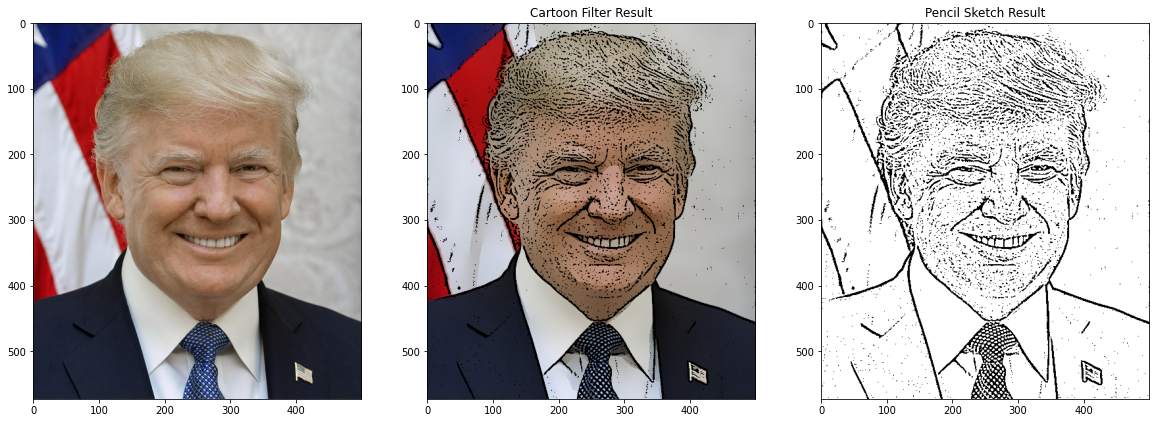

In [6]:
plt.figure(figsize=[20,10])
plt.subplot(131);plt.imshow(image[:,:,::-1]);
plt.subplot(132);plt.imshow(cartoonImage[:,:,::-1]); plt.title("Cartoon Filter Result")
plt.subplot(133);plt.imshow(pencilSketchImage); plt.title("Pencil Sketch Result")

# Additional Filter for Bonus Marks
Resource - [Pecil Sketch Blending Filter](https://anishdubey.com/pencil-sketch-blending-filter-images-opencv)

In [7]:
def pencilShade(image):
    # GrayScale Image
    grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Invert the image
    grayImageInv = 255 - grayImage
    
    # Apply Gaussian Blur
    grayImageInv = cv2.GaussianBlur(grayImageInv, (51, 51), 10)
    
    # Blend using color dodge
    output = cv2.divide(grayImage, 255-grayImageInv, scale=256.0)

    return output

Text(0.5, 1.0, 'Pencil Shade Result')

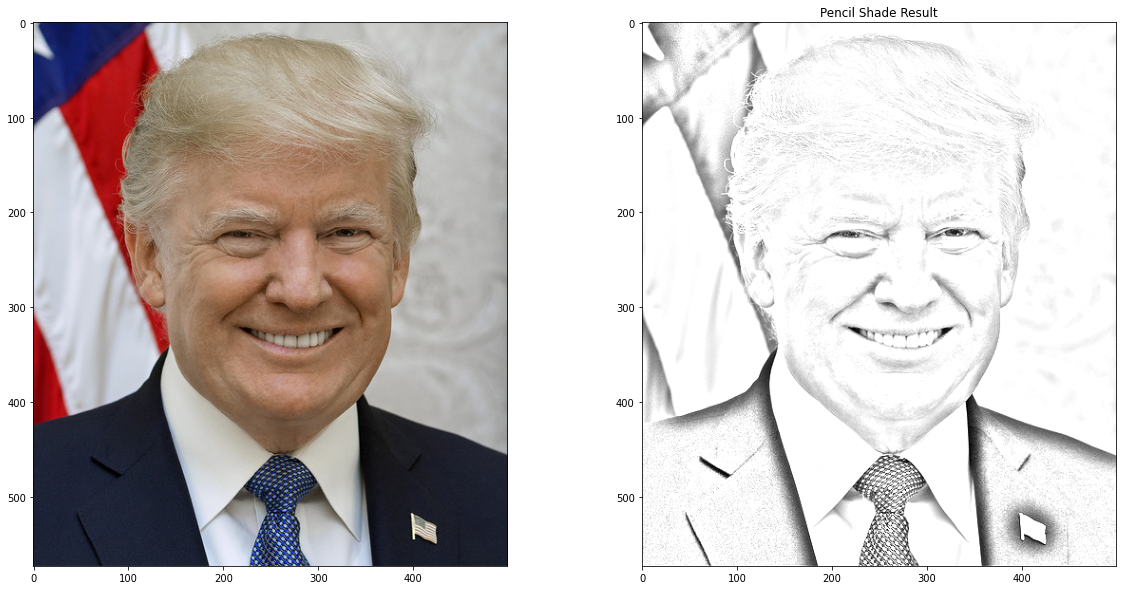

In [8]:
pencilShadeImage = pencilShade(image)

plt.figure(figsize=[20,10])
plt.subplot(121);plt.imshow(image[:,:,::-1]);
plt.subplot(122);plt.imshow(pencilShadeImage); plt.title("Pencil Shade Result")